# Introduction to Regression with Neural Networks in 

A regression problem can be simply defined as predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number.


In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)


2.8.2


## Creating data to view and fit

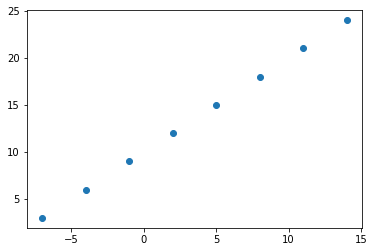

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X =  np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Crete labels 
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y);

In [3]:
y ==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for or housing problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in  modeling wit TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to imroveits learning) and evaluation matrix (what we can use to interpret the performance of our model
3. **Fitting a model** - letting the model try to find patterns between X & y(features and labels)



In [5]:
# Turn NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype =tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# set random seed
tf.random.set_seed(42)
 
#1. Create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) # (one input for one output hence 1)

#2. Compile the model
model.compile (loss = tf.keras.losses.mae, #mae is short for mean absoluate error)
               optimizer = tf.keras.optimizers.SGD(), #sgd is the stochastic  gradient descent
               metrics = ["mae"])
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 333ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [7]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
# Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [9]:
# even with our error accounted for, we're still far off 27
witherror = y_pred +11
witherror

array([[23.71602]], dtype=float32)

## Improving the Model

We can improve our model by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units also called neurons) within each of those layers, change the activation functions of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization fucntion.

3. **Fitting a model** - here we might fit a model for more**epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

Usually, for a large model you'd break it up into different subsets or smaller models, test to see if thsose smaller models work and then combine them all into the larger model for testing, more efficient

In [10]:
# Let's rebuild our model 

#1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mae"])

#3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 278ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [11]:
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [12]:
# Clearly there's a substantial improvement on our model, so much closer to 27

# Let'ssee if changing the no. of layers will improve the model



In [13]:
# Let's rebuild our model 

#1. Create the model with an extra hidden layer with 100 hidden units
model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mae"])

#3. Fit the model 
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 327ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 9ms/ste

In [14]:
y_pred = model.predict([17.0])
y_pred

array([[31.223137]], dtype=float32)

In [15]:
#Suddenl, even though the mae is lower, this model has performed worse than the previous model, perhaps our model is overfitting the data and has become too familiar with the training data. The metrics that we see during training aren't representative of the performanceof the model  against data it hasn't seen before

In [16]:
 #what if we reduce the number of layers and take away activation function
 

In [17]:
# Let's rebuild our model 

#1. Create the model with an extra hidden layer with 50 hidden units
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mae"])

#3. Fit the model 
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 500ms/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.7908 - mae: 11.7908
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2845 - mae: 11.2845
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.7678 - mae: 10.7678
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2381 - mae: 10.2381
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.6928 - mae: 9.6928
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1289 - mae: 9.1289
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.5437 - mae: 8.5437
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.9341 - mae: 7.9341
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2971 - mae: 7.2971
Epoch 11/100
1/1 [==============================] - 0s 9ms/step 

In [18]:
y_pred = model.predict([17.0])
y_pred

array([[30.220297]], dtype=float32)

In [19]:
#Let's try changing the optimizer now



In [20]:
# Let's rebuild our model 

#1. Create the model with an extra hidden layer with 50 hidden units
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.Adam(),
             metrics = ["mae"])

#3. Fit the model 
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 712ms/step - loss: 12.5419 - mae: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4726 - mae: 12.4726
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4032 - mae: 12.4032
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3338 - mae: 12.3338
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2644 - mae: 12.2644
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 12.1950 - mae: 12.1950
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1256 - mae: 12.1256
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0561 - mae: 12.0561
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9866 - mae: 11.9866
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9171 - mae: 11.9171
Epoch 11/100
1/1 [==============================] - 0

In [21]:
y_pred = model.predict([17.0])
y_pred

array([[31.509876]], dtype=float32)

In [22]:
#Let's change the learning rate now

In [23]:
# Let's rebuild our model 

#1. Create the model with an extra hidden layer with 50 hidden units
model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.Adam(lr=0.01), #lr =0.001 by default
             metrics = ["mae"])

#3. Fit the model 
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.0125 - mae: 12.0125
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2511 - mae: 11.2511
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.4828 - mae: 10.4828
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.7066 - mae: 9.7066
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9205 - mae: 8.9205
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 8.1219 - mae: 8.1219
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3079 - mae: 7.3079
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9190 - mae: 6.9190
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 7.2155 - mae: 7.2155
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4987 - mae: 7.4987
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - lo

In [24]:
y_pred = model.predict([17.0])
y_pred

array([[26.260729]], dtype=float32)

In [25]:
#The above is by far our best model so far, adjusting the lr of our optimizer gave us the best performance so far. Lr is probably the most important hyperparameter we could change in all of our neural networks

In [26]:
#We could also have increased the size of our dataset


##Evaluating a Model

In practice, a typical  workflow you'll go through when building neaural networks is :

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evluate it -> tweak a model -> fit it -> evaluate it.....
```

When it comes to evluation ... there are 3 words that you should memorize: 

 >   "Visualize, visualize, visualize"

 It's a good idea to visualize:
 * The data - what data are we working with? What does it look like?
 * The model itself - what does our model look like?
 * The training of a model - how does a model perform while it learns?
 * The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?



In [27]:
# Make a bigger dataset 
X  = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [28]:
#Make labels for the dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

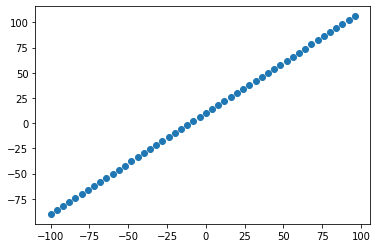

In [29]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* **Training** set - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation** set - the model gets tuned on this data, which is typically 10-15% of the data available 
* **Test** set -  the model gets evaluated on this data to test what it has learned,typically 10-15% of total data available

In [30]:
# Check the length of how many samples we have
len(X)

50

In [31]:
# Lets skip validation set for now, split data into train and test sets

X_train = X[:40] #first 40 are training samples (80% of the data)
y_train = y[:40]

X_test =  X[40:] # the last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data 

Now we've got out data in training and test sets... let's visualize it again!

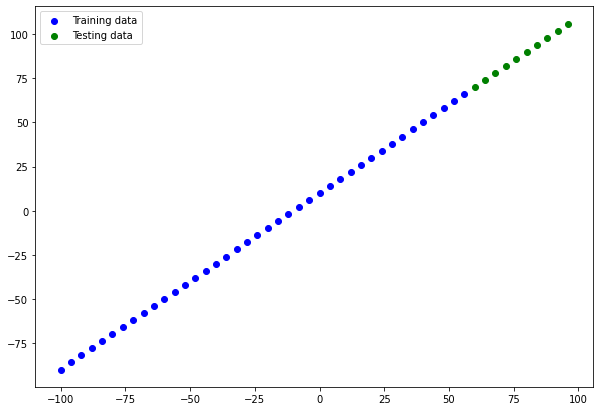

In [32]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label = "Training data")

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing data")

#Show legend 
plt.legend();

In [33]:
#Let's have a look at how to build a neural network for our data 

In [34]:
# Let's rebuild our model 

#1. Create the model with an extra hidden layer with 50 hidden units
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1),
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mae"])

#3. Fit the model 
#model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

In [35]:
# Lets create a model which builds automatically by defining the input shape argument


tf.random.set_seed(42)
#1. Create the model with an extra hidden layer with 50 hidden units
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1]),
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mae"])

#3. Fit the model 
#model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

In [36]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params -  total number of parameters in model
* Trainable params -  these are the parameters that the model can X_train
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already 
learnt parameters from other models during ***transfer learning***)

In [37]:
# lets fit the model to the training data 

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose =0) #verbose hides all training progess

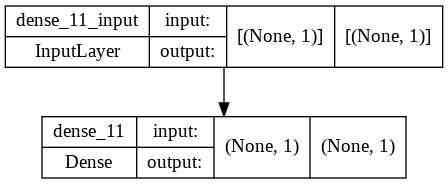

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes = True)

In [39]:
# Lets create a model which builds automatically by defining the input shape argument


tf.random.set_seed(42)
#1. Create the model with an extra hidden layer with 10 hidden units
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
        tf.keras.layers.Dense(1, name = "output_layer")
], name = "blob")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),  
             metrics = ["mae"])

#3. Fit the model 
model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s

In [40]:
model.summary()

Model: "blob"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


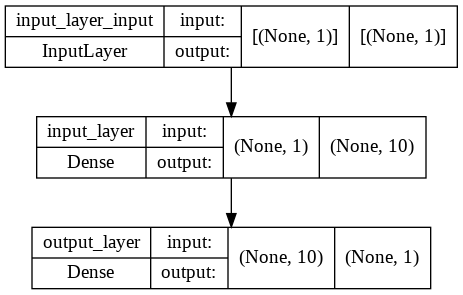

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes = True)

### Visualizing our model's predictions

To visualize [redictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [42]:
# Make some predictions
y_pred =model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [43]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>


**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [44]:
# Let's create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels =y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions =  y_pred):
  

  """
  Plots training data, test data, and compares preditions to ground truth labels.
  """


  plt.figure (figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label ="Testing data")
  #Plot model's predictions in red 
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #Show the legend  
  plt.legend();


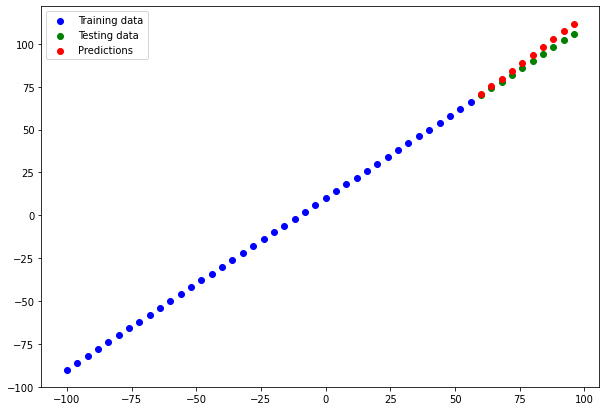

In [45]:
plot_predictions()

#After some refining changing optimizer to Adam, learning rate to 0.01 and increasing input layers to 50 gave best results
# reverted back to original model because instructor does refinement later

### Evaluating our models predictions with regression evaltion metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics you'll see are:
* MAE - mean absolute error, on average, how wrong is each oof my models predictions
* MSE -  mean square error, "square the average errors -  useful when larger errors are more significant than smaller errors"
* Huber - "Combination of MSE and MAE. Less sensitive to outliers than MSE."

In [46]:
# Evaluation the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 355ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [47]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [48]:
y_test, tf.constant(y_pred)

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 70.55218 ],
        [ 75.13991 ],
        [ 79.72763 ],
        [ 84.31535 ],
        [ 88.903076],
        [ 93.49081 ],
        [ 98.07853 ],
        [102.66625 ],
        [107.253975],
        [111.8417  ]], dtype=float32)>)

In [49]:
#notice difference in shapes between y_pred and y_test, we have to use squueze method before checking mae in order to get correct result
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [50]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [51]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [52]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

###Run experiments ot further improve our model

```

Build a model -> fit it-> evaluate it-> tweak it-> fit it-> evaluate it-> tweak it-> evaluate it...

```

1. Get more training data (more opportunities for machine to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this may come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance o find patterns in the data

Let's do 3 modelling experiements:

1. `model_1` -  same as the original model, 1 layer but trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs


### **Build `model_1`** 

In [53]:
# Lets create a model which builds automatically by defining the input shape argument


tf.random.set_seed(42)
#1. Create the model 
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1]),
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mae"])

#3. Fit the model 
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

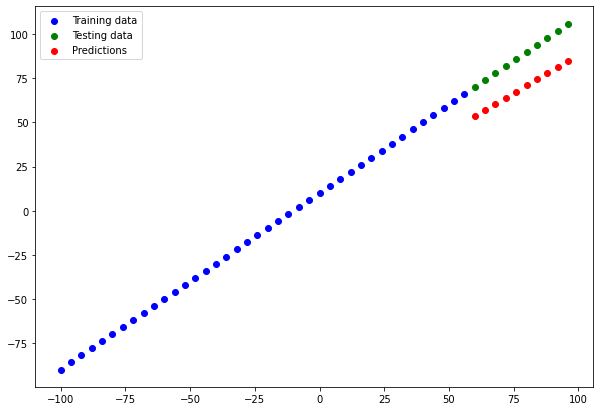

In [54]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [55]:
# Calculate model_1 evaluation metrics
mae_1 =  mae(y_test, y_preds_1)
mse_1 =  mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### **Build `model_2`**

*2 dense layers trained for 100 epochs

In [56]:
# Lets create a model which builds automatically by defining the input shape argument


tf.random.set_seed(42)
#1. Create the model
model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mse"])

#3. Fit the model 
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

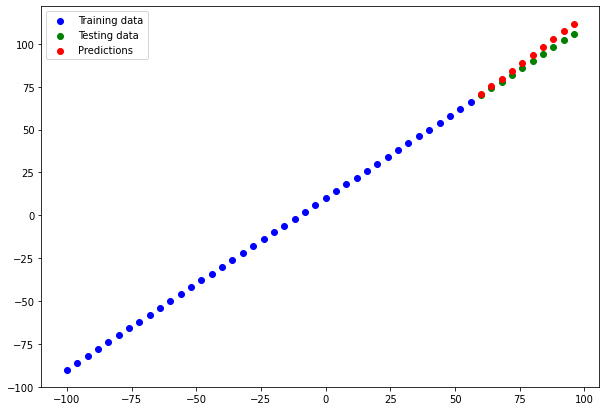

In [57]:
#Make and plot predictions of model_2
y_preds_2 =  model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [58]:
#Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

### **Build `model_3`**

* 2layers with 500 epochs

In [59]:
# Lets create a model which builds automatically by defining the input shape argument


tf.random.set_seed(42)
#1. Create the model
model_3= tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
             metrics = ["mse"])

#3. Fit the model 
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=0)

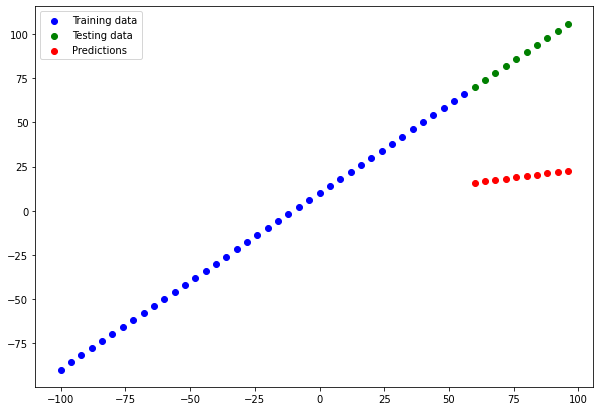

In [60]:
#Make and plot predictions of model_2
y_preds_3 =  model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [61]:
#Calculate model_2 evaluation metrics

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**The above is a prime example of how the model has trained for too long, intuitively we'd think we'd get a better result but this is the worst from the lot - clearly overfitted! (learnt the training data too well and doesn't generalize to data that it hasn't seen before)**

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary

## Comparing the results of our experiments

We've run a few experiments now, let's compare the results

In [62]:
# Lets's compare our mode's results using a pandas  DataFrame

import pandas as pd 
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model 3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model 3,68.713615,4808.027344


🔑 **Note** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, you will get closer tp figuring out what does work.

Remember **experiment, experiment, experiment**

## Tracking your experiments

One really good habit in ML is to track  results of your experiments.

And, when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📚 **Resource** As you build more models, you'll want to look into using:
* TensorBoard - a component of the TensorFlow library to help track modelling experiements
* Weights & Biases - A tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).




## Saving our models

Saving our models allos us to sue them outside of Google colab or wherever they were trained in a web application or a mobile app.

There are two main formats we can save our model to:

1. The SavedModel format
2. The HDF5 format

In [63]:
# Save a model using the SavedModel format 
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [64]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [65]:
# Load in a SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()



Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [67]:
#The architecture between the loaded model and the original model is clearly the same, however, we now need to see if the weights are saved too. Let's see if model_2 and the saved model can make the same predictions.

#Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds #should return true

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true=y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [69]:
# Load in a model using the .h5 format
loaded_h5_model =  tf.keras.models.load_model('/content/best_model_HDF5_format.h5')

In [70]:
loaded_h5_model.summary(), model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 3

(None, None)

In [71]:
#Check to see if loaded .h5 predictions match model_2 predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from Google colab?

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right-click on the file you're after and click "download".
2. Use Code
3. Save it to Google drive by connecting Google drive and copying it there (see 2nd code cell below)

In [72]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Save a file from Google Colab to Google Drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlowLearnings

In [75]:
!ls /content/drive/MyDrive/TensorFlowLearnings

best_model_HDF5_format.h5


## A larger example

In [76]:
#Import the required libraries for this larger example

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [78]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [79]:
#We need to convert all columns into numerical columns, we do this by one-hot encoding those columns, the pd.get_dummies function allows us to do this

In [80]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [81]:
# Create X&y values (features and labels)
X = insurance_one_hot.drop("charges", axis =1)
y = insurance_one_hot["charges"]

In [82]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [83]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [84]:
# Create training and test sets, the following funcion creates those sets for you randomly from ypur features and labels matrices

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split (X, y, test_size =0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [85]:
# Build a neaural network (sort of like model_2 above)
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [86]:
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [87]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [88]:
#is an mae of around 7000 large relative to our training dataset? 

y_train, y_train.median(), y_train.mean()

# for a median of 9575, clearly it is

(560      9193.83850
 1285     8534.67180
 1142    27117.99378
 969      8596.82780
 486     12475.35130
            ...     
 1095     4561.18850
 1130     8582.30230
 1294    11931.12525
 860     46113.51100
 1126    10214.63600
 Name: charges, Length: 1070, dtype: float64, 9575.4421, 13346.089736364489)

Right now it looks like our model isn't performing too well, let's try to improve it

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units
2. Train for longer
3. Change optimizer and adjust learning rate

In [89]:
#Set random seed
tf.random.set_seed(42)

#1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose = 0)




In [90]:
#Evaluate the larger model, SGD didn't work so we switched to Adam
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [91]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

30% or so decrease in error rate by adding extra layer with more hidden units and using Adam

In [92]:
#Set the random set
tf.random.set_seed(42)

#1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#2 Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

#3 Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs = 200, verbose = 0)


In [93]:
#Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

We've basically halved our error rate from the first model

Text(0.5, 0, 'epochs')

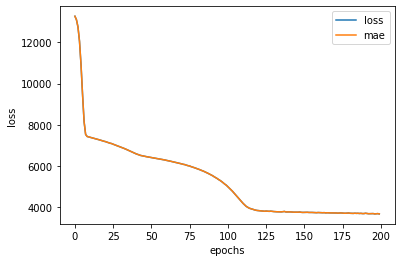

In [94]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

 My own experiment



In [95]:
#Set the random set
tf.random.set_seed(42)

#1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

#2 Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                          metrics = ["mae"])

#3 Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs = 500, verbose = 0)


In [96]:
#Evaluate our third model
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3182.8901 - mae: 3182.8901


[3182.89013671875, 3182.89013671875]

Text(0.5, 0, 'epochs')

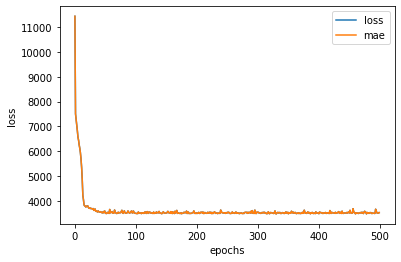

In [97]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really ... it depends on the problem you're working on. However,  many people have asked this question before so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow compontent that you can add to your training once it stops improving a certain metric.

##Preprocessing data (normalization and standardization)

In [98]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


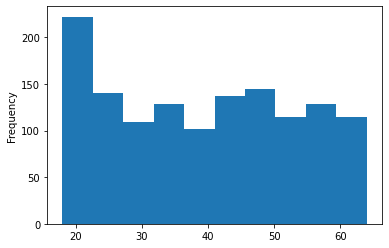

In [99]:
X["age"].plot(kind="hist")

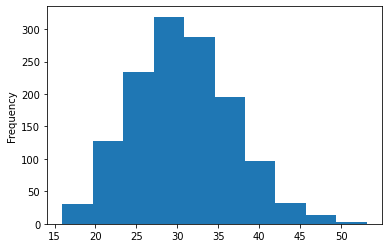

In [100]:
X["bmi"].plot(kind="hist")

Normalization in machine learning involves having all numerical values in a dataset changed onto a common scale. It converts all numbers toa value between 0 and 1 whilst preserving the distribution. Meant to reduce effects of outliers.

In terms of scaling values, neural networks tend to prefer normalization. If you're not sure on which to use, you could try both and see which performs better.|

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#Read in insurance dataframe 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [104]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data 
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [105]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [107]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [108]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one-hot encoded. Now let's build a neural network model on it and see how it goes.

In [110]:
# Build a neural network model to fit on our normalized data

tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2.Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae, 
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae"])

#3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [111]:
# evaluate insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

Insurance model 2 before being normalized had a loss of 4942 and an mae of 4942

Just by normalizing our ddata we've gone from 5000 mae to 3500 mae, normalzition leads to faster convergance of data